In [13]:
using Ising
using Gadfly

In [4]:
using Images

In [8]:
using HDF5, JLD
@load "resultados.jld"

2-element Array{Symbol,1}:
 :conCampoH
 :sinCampoH

#Modelo de Ising en tres dimensiones
###Christian Ladrón de Guevara

Lo primero es crear un estado

In [ ]:
σ = Microestado((10,10,10),1/2.0)

Ajustar sus parámetros y ejecutar unos pasos, el resultado es un *diccionario* con los valores de *Magnetización total* y *Energía*.

In [49]:
σ.β=1/2.0
correSweeps(σ,800)

Dict{Any,Any} with 2 entries:
  "M" => [972.0,984.0,994.0,996.0,994.0,992.0,994.0,992.0,988.0,986.0,990.0,996…
  "E" => [-2848.0,-2904.0,-2964.0,-2976.0,-2968.0,-2952.0,-2964.0,-2952.0,-2936…

##Modelo de Ising 3D sin campo Magnético externo
Prepara muchas ejecuciones, se barren las temperaturas entre 3.0 y 6.0 en pasos de 0.1, para sistemas de tamaños 5x5x5, 7x7x7,
9x9x9,11x11x11 y 13x13x13.

De los datos obtenidos de cada simulación se calcula la *magnetización por espín* y el *calor específico*


In [87]:
Ts = [3.0:0.1:6.0] #Temperaturas
Ls = 5:2:13 #Tamaños de los sistemas
Magnetizaciones = zeros(length(Ls),length(Ts)) #Se crean matrices donde se almacenarán los resultados
calores = zeros(length(Ls),length(Ts))
σ.H = 0
for i in 1:length(Ls) #Se barren los tamaños
    σ.configuración = fill(1,(Ls[i],Ls[i],Ls[i]))
    σ.β=1/2.0
correSweeps(σ,1000)
    for T in 1:length(Ts) #Se barren las temperaturas
    σ.β = 1/Ts[T];
 mediciones = correSweeps(σ,4000)
Ms = medicionesIndependientes(mediciones["M"],5)
Es = medicionesIndependientes(mediciones["E"],5)
M = mean(Ms)/length(σ.configuración)
c = var(Es) * σ.β^2 / length(σ.configuración)
        Magnetizaciones[i,T] = M
        calores[i,T] = c
end
end

In [93]:
sinCampoH = copy({("Ts",Ts),("Ls",Ls),("Magnetizaciones",Magnetizaciones),("colores",calores)})

4-element Array{Any,1}:
 ("Ts",[3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9  …  5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0])                                                                                                                                                                                                                                                                                                                    
 ("Ls",5:2:13)                                                                                                                                                                                                                                                                                                                                                                                                   
 ("Magnetizaciones",
5x31 Array{Float64,2}:
 0.9442    0.93304   0.92432   0.90836   …   0.01432      0.00508   
 0.943324  0.935292  0.926224  0.912901      0.0058309    0

Resultados de ejecución:

In [32]:
Magnetizaciones = sinCampoH[3][2]
Ts=sinCampoH[1][2]
calores = sinCampoH[4][2]
Ls=sinCampoH[2][2]

5:2:13

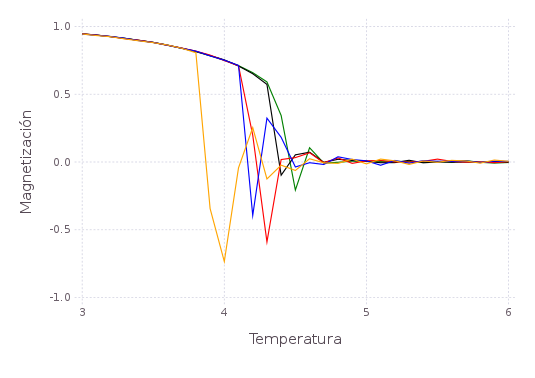

In [22]:
plot(layer(x=Ts,y=Magnetizaciones[1,:],Geom.line,Theme(default_color=color("orange"))),
layer(x=Ts,y=Magnetizaciones[2,:],Geom.line,Theme(default_color=color("blue"))),
layer(x=Ts,y=Magnetizaciones[3,:],Geom.line,Theme(default_color=color("red"))),
layer(x=Ts,y=Magnetizaciones[4,:],Geom.line,Theme(default_color=color("black"))),
layer(x=Ts,y=Magnetizaciones[5,:],Geom.line,Theme(default_color=color("green"))),Guide.ylabel("Magnetización"),Guide.xlabel("Temperatura"))

Naranja: $5^3$,Azul: $7^3$,Rojo: $9^3$,Negro: $11^3$,Verde: $13^3$

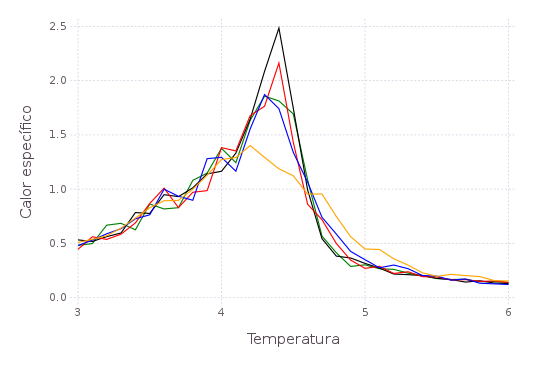

In [27]:
plot(layer(x=Ts,y=calores[1,:],Geom.line,Theme(default_color=color("orange"))),
layer(x=Ts,y=calores[2,:],Geom.line,Theme(default_color=color("blue"))),
layer(x=Ts,y=calores[3,:],Geom.line,Theme(default_color=color("red"))),
layer(x=Ts,y=calores[4,:],Geom.line,Theme(default_color=color("black"))),
layer(x=Ts,y=calores[5,:],Geom.line,Theme(default_color=color("green"))),Guide.ylabel("Calor específico"),Guide.xlabel("Temperatura"))

Naranja: $5^3$,Azul: $7^3$,Rojo: $9^3$,Negro: $11^3$,Verde: $13^3$

##Modelo de Ising 3D con campo Magnético
Prepara muchas ejecuciones, se barren las temperaturas entre 2.0 y 8.0 en pasos de 0.4, para sistemas de tamaños 5x5x5, 7x7x7,
9x9x9,11x11x11 y 13x13x13.

Se define el valor de el campo magnético en el campo *H* del objeto tipo *Microestado*

De los datos obtenidos de cada simulación se calcula la *magnetización por espín* y el *calor específico*


In [101]:
Ts = [2.0:0.4:8.0]
Ls = 5:2:13
Magnetizaciones = zeros(length(Ls),length(Ts))
calores = zeros(length(Ls),length(Ts))
σ.H = 1                                           #se define campo magnético distinto de 0
for i in 1:length(Ls)
    σ.configuración = fill(1,(Ls[i],Ls[i],Ls[i]))
    σ.β=1/2.0
correSweeps(σ,1000)
for T in 1:length(Ts)
    σ.β = 1/Ts[T];
 mediciones = correSweeps(σ,3000)
Ms = medicionesIndependientes(mediciones["M"],5)
Es = medicionesIndependientes(mediciones["E"],5)
M = mean(Ms)/length(σ.configuración)
c = var(Es) * σ.β^2 / length(σ.configuración)
        Magnetizaciones[i,T] = M
        calores[i,T] = c
end
end

In [102]:
conCampoH = copy({("Ts",Ts),("Ls",Ls),("Magnetizaciones",Magnetizaciones),("colores",calores)})

4-element Array{Any,1}:
 ("Ts",[2.0,2.4,2.8,3.2,3.6,4.0,4.4,4.8,5.2,5.6,6.0,6.4,6.8,7.2,7.6,8.0])                                                                                                                                                                                                                                                                                                                                                  
 ("Ls",5:2:13)                                                                                                                                                                                                                                                                                                                                                                                                             
 ("Magnetizaciones",
5x16 Array{Float64,2}:
 0.99872   0.99392   0.984533  0.969813  …  0.421653  0.367947  0.344693
 0.997843  0.993605  0.984781  0.96

In [33]:
Magnetizaciones = conCampoH[3][2]
Ts=conCampoH[1][2]
calores = conCampoH[4][2]
Ls=conCampoH[2][2]

5:2:13

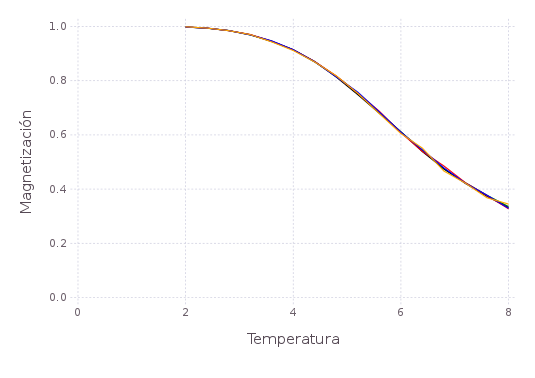

In [34]:
plot(layer(x=Ts,y=Magnetizaciones[1,:],Geom.line,Theme(default_color=color("orange"))),
layer(x=Ts,y=Magnetizaciones[2,:],Geom.line,Theme(default_color=color("blue"))),
layer(x=Ts,y=Magnetizaciones[3,:],Geom.line,Theme(default_color=color("red"))),
layer(x=Ts,y=Magnetizaciones[4,:],Geom.line,Theme(default_color=color("black"))),
layer(x=Ts,y=Magnetizaciones[5,:],Geom.line,Theme(default_color=color("green"))),Guide.ylabel("Magnetización"),Guide.xlabel("Temperatura"))

Naranja: $5^3$,Azul: $7^3$,Rojo: $9^3$,Negro: $11^3$,Verde: $13^3$

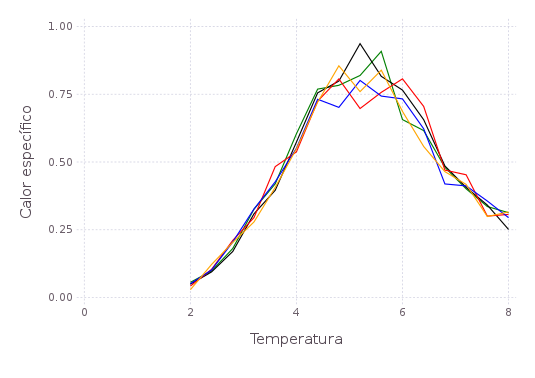

In [35]:
plot(layer(x=Ts,y=calores[1,:],Geom.line,Theme(default_color=color("orange"))),
layer(x=Ts,y=calores[2,:],Geom.line,Theme(default_color=color("blue"))),
layer(x=Ts,y=calores[3,:],Geom.line,Theme(default_color=color("red"))),
layer(x=Ts,y=calores[4,:],Geom.line,Theme(default_color=color("black"))),
layer(x=Ts,y=calores[5,:],Geom.line,Theme(default_color=color("green"))),Guide.ylabel("Calor específico"),Guide.xlabel("Temperatura"))

Naranja: $5^3$,Azul: $7^3$,Rojo: $9^3$,Negro: $11^3$,Verde: $13^3$

#Gracias
https://github.com/christianladron/

In [106]:
@save "resultados.jld" sinCampoH conCampoH